A notebook for capturing calibration data for the cameras of the OROCHI Simualtor of the Kameda Lab.

Third round of experiments after procedure upgrade.

Now using a gain of 4.27 dB to raise apparent full well to 20000 e-, and sensitivity to 4.88 e-/DN.
Reducing Blacklevel to 8 DN from 128 DN, to increase sensitive range.

# Process Overview

The objective of this notebook is to capture uniformly illuminated and dark images (across the sampling area) that can be used to characterise each camera of the OROCHI simulator, in terms of:
- Linearity
- Read Noise
- Gain
- FPN
- Dark Signal

To do this, we will  capture images of the 99% Reflectance Spectralon Calibration Target (SCT99) and the 5% Reflectance Spectral Calibration Target (SCT5), and images without illumination, at exposures that range from the minimum possible with the cameras (~5 µs) up to a maximum, defined such that all pixels of the image are saturated (DN=255).

For each exposure, we will capture:
- 2 illuminated images of the target
- 25 dark images (to reduce read noise by factor of 5)

We will choose exposures with the following procedure:
1. Start at minimum exposure - capture pair, record exposure
2. Double exposure - capture pair, record exposure
3. Repeat until all pixels are saturated - i.e. all = 255
4. Reduce exposure by factor of 0.90, and repeat, until 0 pixels are saturated.

This process will be repeated for SCT99 and SCT5, and then again for dark images.
Then, 25 dark frames will be captured for each exposure, and the mean and standard deviation TIFF float images recorded.


# Camera Setup

Here we configure and setup the camera capture objects.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_ctrl as osc

ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

Device 0 (DMK 33GX249 10910288) succesfully connected.
Device 1 (DMK 33GX249 10910273) succesfully connected.
Device 3 (DMK 33GX249 10910294) succesfully connected.
Device 4 (DMK 33GX249 10910291) succesfully connected.
Device 5 (DMK 33GX249 10910295) succesfully connected.
Device 7 (DMK 33GX249 23120778) succesfully connected.
Device 6 (DMK 33GX249 10910265) succesfully connected.
-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
1
Video Format set to : Y16 (1920x1200)
1
Sink Format set to : "SinkFormats.Y16"
Frame Rate set to : 30.0 FPS
Brightness Value set to 8
Contrast Value set to 0
Sharpness Value set to 0
Gamma Value set to 100
Gain Value set to 4.269999980926514
Gain Auto set to 0
Exposure Value set to 0.009999999776482582
Exposure Auto set to 1
Exposure Auto Reference set to 80
Exposure Auto Max Value set to 10.0
Exposure Auto Max Auto set to 0
Trigger Enable set to 0
Denoise Value set to 0
Flip Horizontal Enable set to 0
F

In [3]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from time import sleep

Here we are only going to process images over the calibration target itself, so we restrict the ROI to a very small field of 32x32 pixels.
Statistics are therfore computed over 1024 pixels in each case.

-----------------------------------
Device 0 (DMK 33GX249 10910288)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1703.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0038463890086859465
Exposure set to 0.003845999948680401 (err of 3.889597912994265e-07
Trial 1:
Imaging with Exposure: 0.003845999948680401 s
+Good exposure 0.003845999948680401 Image recieved
Quantile: 3233.0, Target: 3275.2000000000003
Exposure current Value: 0.003845999948680401
Exposure Value set to 0.0038962012622505426
Exposure set to 0.0038960000965744257 (err of 2.0127426320157987e-07
Trial 2:
Imaging with Exposure: 0.0038960000965744257 s
+Good exposure 0.0038960000965744257 Image recieved
Quantile: 3270.0, Target: 3275.2000000000003
Exposure current Value: 0.003896000096

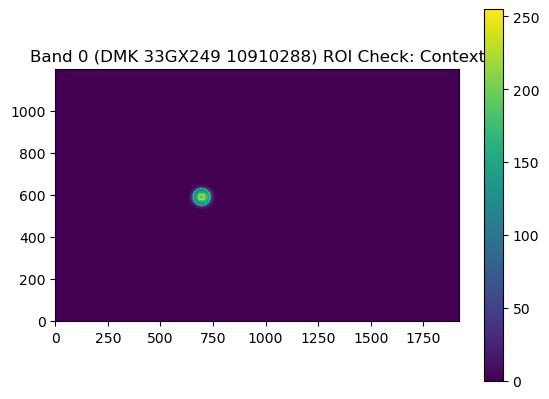

Imaging with Exposure: 0.0039019999094307423 s
+Good exposure 0.0039019999094307423 Image recieved


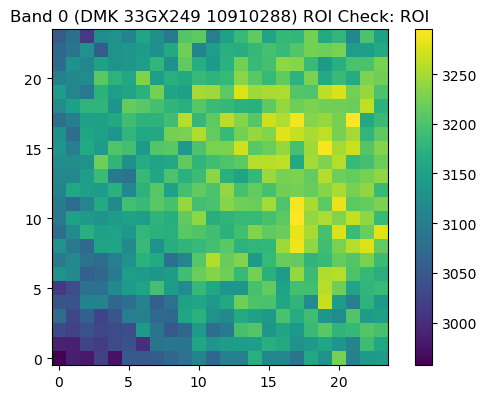

-----------------------------------
-----------------------------------
Device 1 (DMK 33GX249 10910273)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1172.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.005589078646153212
Exposure set to 0.005588999949395657 (err of 7.881436484263177e-08
Trial 1:
Imaging with Exposure: 0.005588999949395657 s
+Good exposure 0.005588999949395657 Image recieved
Quantile: 3207.0, Target: 3275.2000000000003
Exposure current Value: 0.005588999949395657
Exposure Value set to 0.005707855336368084
Exposure set to 0.0057069999165833 (err of 8.55597685691864e-07
Trial 2:
Imaging with Exposure: 0.0057069999165833 s
+Good exposure 0.0057069999165833 Image recieved
Quantile: 3293.0, Target: 3275.2000000000003
Exposure curren

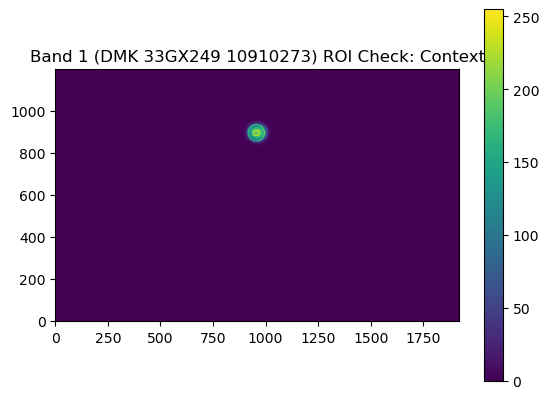

Imaging with Exposure: 0.005700999870896339 s
+Good exposure 0.005700999870896339 Image recieved


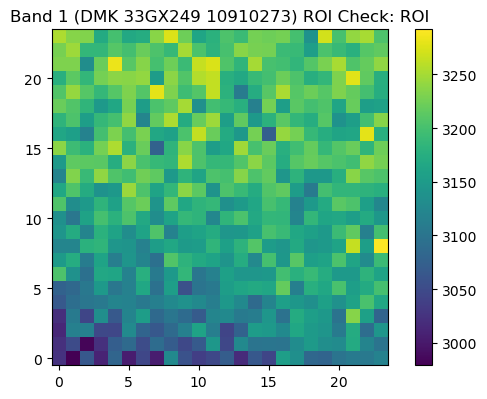

-----------------------------------
-----------------------------------
Device 3 (DMK 33GX249 10910294)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 263.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.12453232705593109
Exposure set to 0.12453199923038483 (err of 3.260762179296828e-07
Trial 1:
Imaging with Exposure: 0.12453199923038483 s
+Good exposure 0.12453199923038483 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.12453199923038483
Exposure Value set to 0.01992511935532093
Exposure set to 0.01992500014603138 (err of 1.1973083019131692e-07
Trial 2:
Imaging with Exposure: 0.01992500014603138 s
+Good exposure 0.01992500014603138 Image recieved
Quantile: 2470.0, Target: 3275.2000000000003
Exposure current 

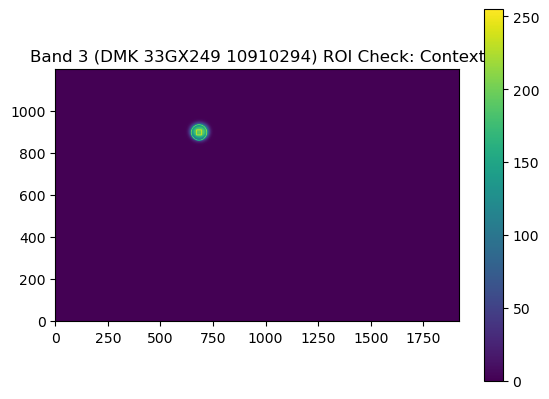

Imaging with Exposure: 0.026657000184059143 s
+Good exposure 0.026657000184059143 Image recieved


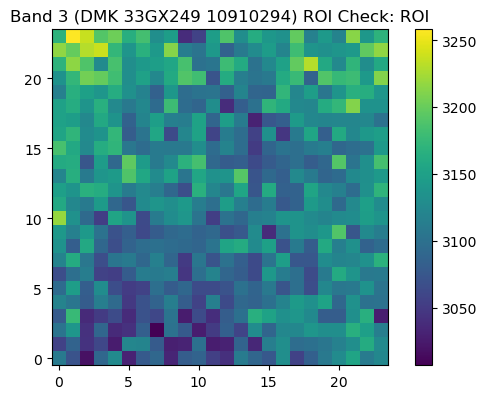

-----------------------------------
-----------------------------------
Device 4 (DMK 33GX249 10910291)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1858.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.003525511361658573
Exposure set to 0.0035250000655651093 (err of 5.114043634727415e-07
Trial 1:
Imaging with Exposure: 0.0035250000655651093 s
+Good exposure 0.0035250000655651093 Image recieved
Quantile: 3235.0, Target: 3275.2000000000003
Exposure current Value: 0.0035250000655651093
Exposure Value set to 0.0035688038915395737
Exposure set to 0.003567999927327037 (err of 8.038484809527735e-07
Trial 2:
Imaging with Exposure: 0.003567999927327037 s
+Good exposure 0.003567999927327037 Image recieved
Quantile: 3289.0, Target: 3275.2000000000003
Exp

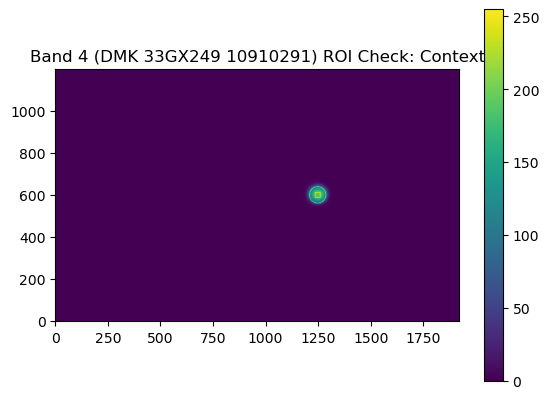

Imaging with Exposure: 0.0035470000002533197 s
+Good exposure 0.0035470000002533197 Image recieved


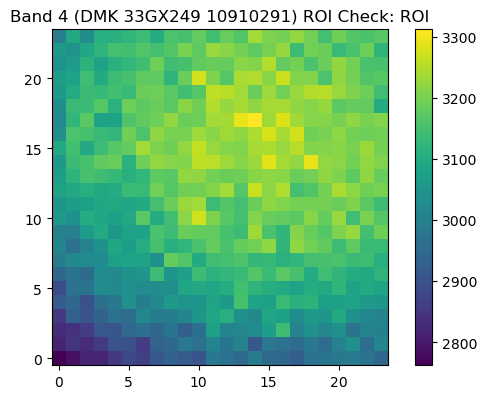

-----------------------------------
-----------------------------------
Device 5 (DMK 33GX249 10910295)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 698.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.009384527802467346
Exposure set to 0.00938399974256754 (err of 5.279238039588435e-07
Trial 1:
Imaging with Exposure: 0.00938399974256754 s
+Good exposure 0.00938399974256754 Image recieved
Quantile: 3169.0, Target: 3275.2000000000003
Exposure current Value: 0.00938399974256754
Exposure Value set to 0.009698477573692799
Exposure set to 0.009697999805212021 (err of 4.779344084295672e-07
Trial 2:
Imaging with Exposure: 0.009697999805212021 s
+Good exposure 0.009697999805212021 Image recieved
Quantile: 3278.0, Target: 3275.2000000000003
Exposure curr

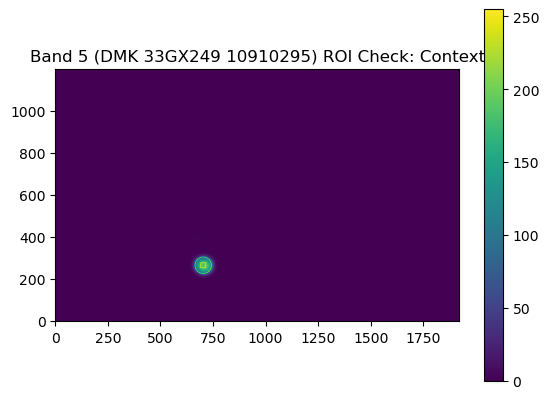

Imaging with Exposure: 0.009697999805212021 s
+Good exposure 0.009697999805212021 Image recieved


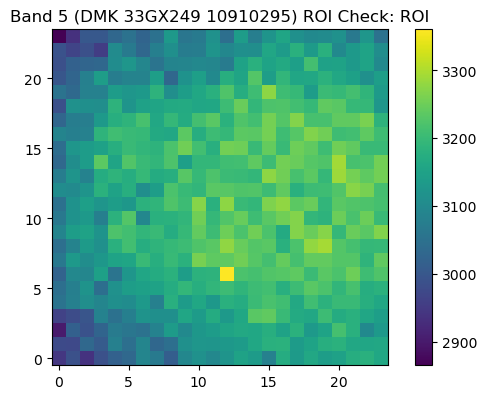

-----------------------------------
-----------------------------------
Device 7 (DMK 33GX249 23120778)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 160.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.20470000803470612
Exposure set to 0.20469999313354492 (err of 1.6589183388093787e-08
Trial 1:
Imaging with Exposure: 0.20469999313354492 s
+Good exposure 0.20469999313354492 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.20469999313354492
Exposure Value set to 0.03275199979543686
Exposure set to 0.03275100141763687 (err of 9.974837303153294e-07
Trial 2:
Imaging with Exposure: 0.03275100141763687 s
+Good exposure 0.03275100141763687 Image recieved
Quantile: 2358.0, Target: 3275.2000000000003
Exposure current 

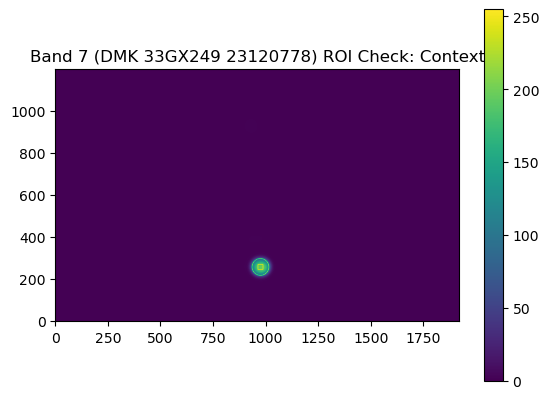

Imaging with Exposure: 0.04596000164747238 s
+Good exposure 0.04596000164747238 Image recieved


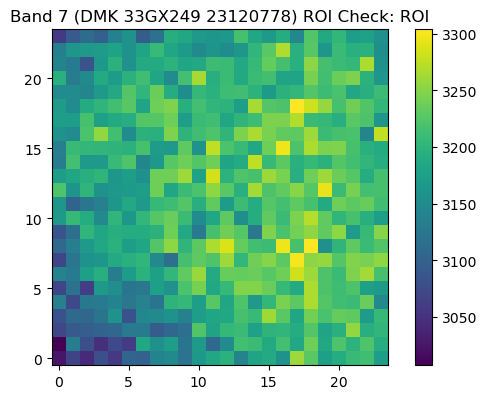

-----------------------------------
-----------------------------------
Device 6 (DMK 33GX249 10910265)
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3781.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0017324518412351608
Exposure set to 0.0017320000333711505 (err of 4.517812618315409e-07
Trial 1:
Imaging with Exposure: 0.0017320000333711505 s
+Good exposure 0.0017320000333711505 Image recieved
Quantile: 3282.0, Target: 3275.2000000000003
Exposure current Value: 0.0017320000333711505
Exposure Value set to 0.0017284115310758352
Exposure set to 0.001728000002913177 (err of 4.114868178382858e-07
Trial 2:
Imaging with Exposure: 0.001728000002913177 s
+Good exposure 0.001728000002913177 Image recieved
Quantile: 3285.0, Target: 3275.2000000000003
Ex

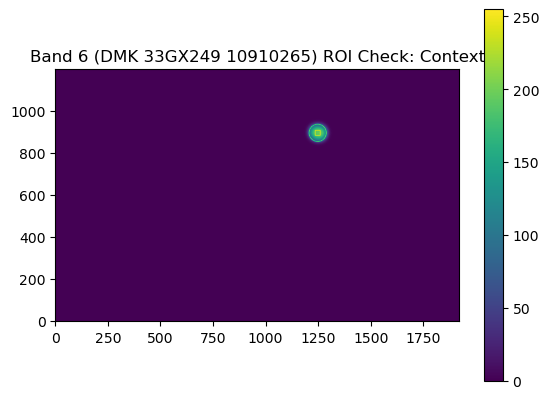

Imaging with Exposure: 0.0017310000257566571 s
+Good exposure 0.0017310000257566571 Image recieved


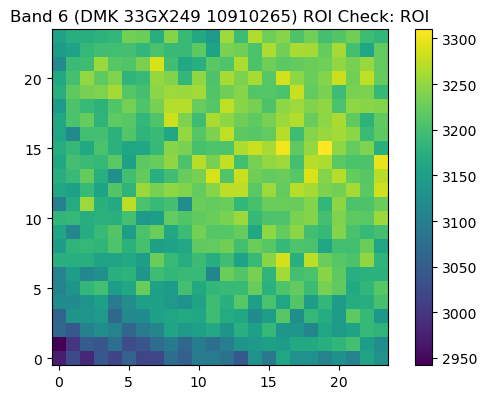

-----------------------------------


In [4]:
osc.find_camera_rois(cameras, roi_size=24)

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1706.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.003839625045657158
Exposure set to 0.0038389998953789473 (err of 6.251404518296116e-07
Trial 1:
Imaging with Exposure: 0.0038389998953789473 s
+Good exposure 0.0038389998953789473 Image recieved
Quantile: 3230.0, Target: 3275.2000000000003
Exposure current Value: 0.0038389998953789473
Exposure Value set to 0.003892722073942423
Exposure set to 0.0038920000661164522 (err of 7.220569006156051e-07
Trial 2:
Imaging with Exposure: 0.0038920000661164522 s
+Good exposure 0.0038920000661164522 Image recieved
Quantile: 3276.0, Target: 3275.2000000000003
Success after 2 trials
Exposure current Value: 0.00389200006

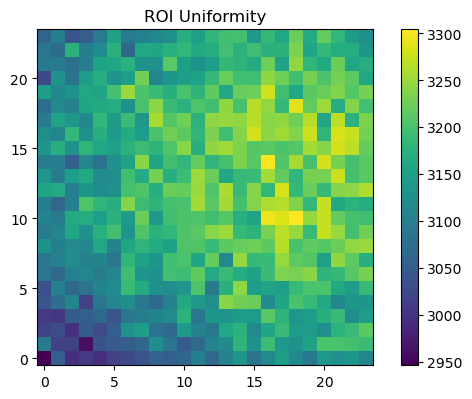

ROI Uniformity: 1.9716978674871923 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1173.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.005584313999861479
Exposure set to 0.005584000144153833 (err of 3.1384657703248386e-07
Trial 1:
Imaging with Exposure: 0.005584000144153833 s
+Good exposure 0.005584000144153833 Image recieved
Quantile: 3212.0, Target: 3275.2000000000003
Exposure current Value: 0.005584000144153833
Exposure Value set to 0.00569387199357152
Exposure set to 0.0056929998099803925 (err of 8.723170845624517e-07
Trial 2:
Imaging with Exposure: 0.0056929998099803925 s
+Good exposure 0.0056929998099803925 Image recieved
Quantile: 3266.0, Target: 3275.20000

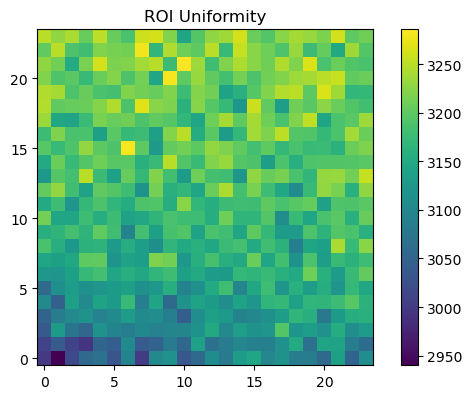

ROI Uniformity: 1.6672843161659852 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 263.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.12453232705593109
Exposure set to 0.12453199923038483 (err of 3.260762179296828e-07
Trial 1:
Imaging with Exposure: 0.12453199923038483 s
+Good exposure 0.12453199923038483 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.12453199923038483
Exposure Value set to 0.01992511935532093
Exposure set to 0.01992500014603138 (err of 1.1973083019131692e-07
Trial 2:
Imaging with Exposure: 0.01992500014603138 s
+Good exposure 0.01992500014603138 Image recieved
Quantile: 2474.0, Target: 3275.2000000000003
Exp

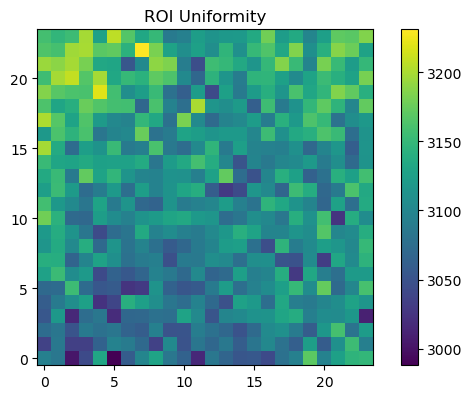

ROI Uniformity: 1.2672169446747514 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 1857.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.003527409862726927
Exposure set to 0.003527000080794096 (err of 4.098875027837637e-07
Trial 1:
Imaging with Exposure: 0.003527000080794096 s
+Good exposure 0.003527000080794096 Image recieved
Quantile: 3238.0, Target: 3275.2000000000003
Exposure current Value: 0.003527000080794096
Exposure Value set to 0.00356752029620111
Exposure set to 0.0035669999197125435 (err of 5.20359662634258e-07
Trial 2:
Imaging with Exposure: 0.0035669999197125435 s
+Good exposure 0.0035669999197125435 Image recieved
Quantile: 3271.0, Target: 3275.2000000

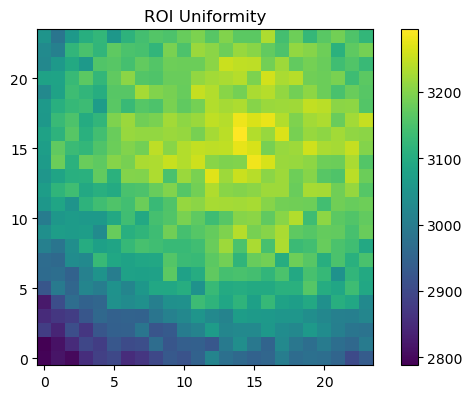

ROI Uniformity: 3.2473315133617957 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 693.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.00945223681628704
Exposure set to 0.009452000260353088 (err of 2.3684084071544376e-07
Trial 1:
Imaging with Exposure: 0.009452000260353088 s
+Good exposure 0.009452000260353088 Image recieved
Quantile: 3196.0, Target: 3275.2000000000003
Exposure current Value: 0.009452000260353088
Exposure Value set to 0.00968622975051403
Exposure set to 0.0096859997138381 (err of 2.3034020083662066e-07
Trial 2:
Imaging with Exposure: 0.0096859997138381 s
+Good exposure 0.0096859997138381 Image recieved
Quantile: 3267.0, Target: 3275.2000000000003
E

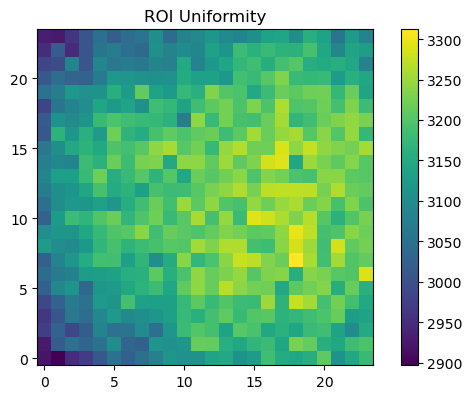

ROI Uniformity: 2.3217272021031103 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 160.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.20470000803470612
Exposure set to 0.20469999313354492 (err of 1.6589183388093787e-08
Trial 1:
Imaging with Exposure: 0.20469999313354492 s
+Good exposure 0.20469999313354492 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.20469999313354492
Exposure Value set to 0.03275199979543686
Exposure set to 0.03275100141763687 (err of 9.974837303153294e-07
Trial 2:
Imaging with Exposure: 0.03275100141763687 s
+Good exposure 0.03275100141763687 Image recieved
Quantile: 2357.0, Target: 3275.2000000000003
Exp

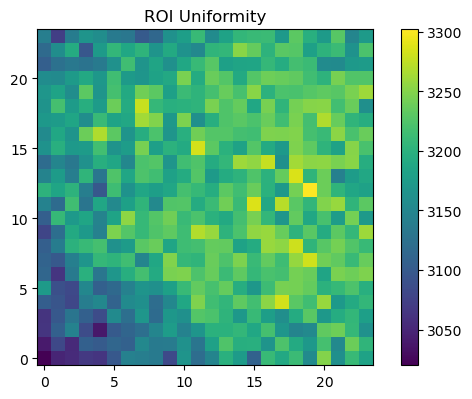

ROI Uniformity: 1.4635570459636769 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 3791.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.0017278819577768445
Exposure set to 0.0017269999952986836 (err of 8.819121471894797e-07
Trial 1:
Imaging with Exposure: 0.0017269999952986836 s
+Good exposure 0.0017269999952986836 Image recieved
Quantile: 3278.0, Target: 3275.2000000000003
Exposure current Value: 0.0017269999952986836
Exposure Value set to 0.0017255247803404927
Exposure set to 0.001724999980069697 (err of 5.248474477677866e-07
Trial 2:
Imaging with Exposure: 0.001724999980069697 s
+Good exposure 0.001724999980069697 Image recieved
Quantile: 3285.0, Target: 3275.20

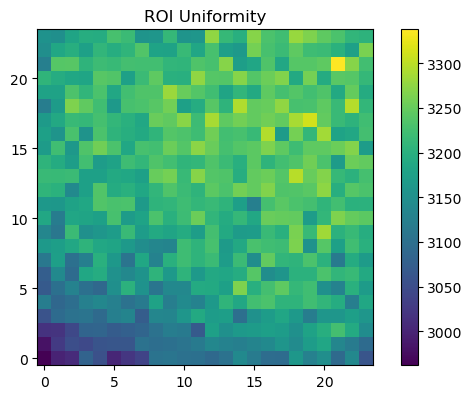

ROI Uniformity: 1.7683918651328199 %
-----------------------------------


In [5]:
osc.check_channel_roi_uniformity(cameras)

# Calibration Functions

Here we define simple functions for controlling the cameras during the calibration routines.

In [6]:
def camera_calibration_sequence(camera, subject) -> pd.DataFrame:
    """Capture pairs of images with increasing exposure time until all
    pixels are saturated, then decrease exposure time until no pixels are 
    saturated.
    
    Args:
        camera: Camera object to capture images from.
    
    Returns:
        DataFrame with columns:
            - exposure
            - mean
            - std
    """
    camera.set_property('Exposure', 'Auto', 0, 'Switch')        
    t_min = 1.0/16666 # (seconds) verify that this is the minimum exposure time
    t_max = 50.0
    t_exp = t_min
    up_scale = 1.2
    dwn_scale = 0.99
    t_scale = up_scale
    img_type='calibration'
    stop = False    
    cmd_exposures = []
    exposures = []
    means = []
    stds = []
    shots = []
    sat_val = camera.max_dn
    while stop is False:
        print(f'Exposure: {t_exp:.7f} s')
        camera.set_property('Exposure', 'Value', t_exp, 'AbsoluteValue')
        img_1 = camera.image_capture(roi=True)
        img_2 = camera.image_capture(roi=True)
        name_1 = f'{t_exp*1E6:.0f}us_1'
        name_2 = f'{t_exp*1E6:.0f}us_2'
        camera.save_image(name_1, subject, img_type, img_1)
        camera.save_image(name_2, subject, img_type, img_2)
        exposures.append(camera.get_exposure_value())
        cmd_exposures.append(t_exp)
        mean = np.mean([np.mean(img_1), np.mean(img_2)])
        std = np.mean([np.std(img_1), np.std(img_2)])
        shot = np.sqrt(np.mean((img_1 - img_2)**2)/2)
        means.append(mean)
        stds.append(std)
        shots.append(shot)
        if mean >= sat_val * 0.999:
            t_scale = dwn_scale
        if t_scale == dwn_scale:
            # n_sat = (np.sum(img_1 == sat_val) + np.sum(img_2 == sat_val)) / 2
            if mean <= sat_val * 0.80:
                stop = True
        else:
            if t_exp*t_scale > t_max:
                t_scale = dwn_scale
        t_exp = t_exp * t_scale

    results = pd.DataFrame({'exposure': exposures, 'raw mean': means, 'raw standard deviation': stds, 'shot and read noise': shots})
    results.sort_values('exposure', inplace=True)

    print(results)

    cwl_str = str(int(camera.camera_props['cwl']))
    channel = str(camera.camera_props['number'])+'_'+cwl_str
    subject_dir = Path('..', 'data', subject, channel)
    subject_dir.mkdir(parents=True, exist_ok=True)
    filename = 'exposures.csv'
    img_file =str(Path(subject_dir, filename).with_suffix('.tif'))

    results['exposure'].to_csv(f'{subject}_exposures.csv', index=False)

    fig, ax = plt.subplots(2,1, figsize=(5,10))
    ax[0].plot(results['exposure'], results['raw mean'])
    ax[0].set_xlabel('Exposure (s)')
    ax[0].set_ylabel('Mean Pixel Value')
    results.sort_values('raw mean', inplace=True)
    ax[1].loglog(results['raw mean'], results['raw standard deviation'], label='Total Noise')
    ax[1].loglog(results['raw mean'], results['shot and read noise'], label='Shot and Read Noise')
    ax[1].set_xlabel('Mean Pixel Value')
    ax[1].set_ylabel('Standard Deviation')
    plt.show()
    return cmd_exposures

# SCT99 Procedure

Output:
- SCT99 Exposure List
- SCT99 Lit Image Directory

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\0_650\650_72us

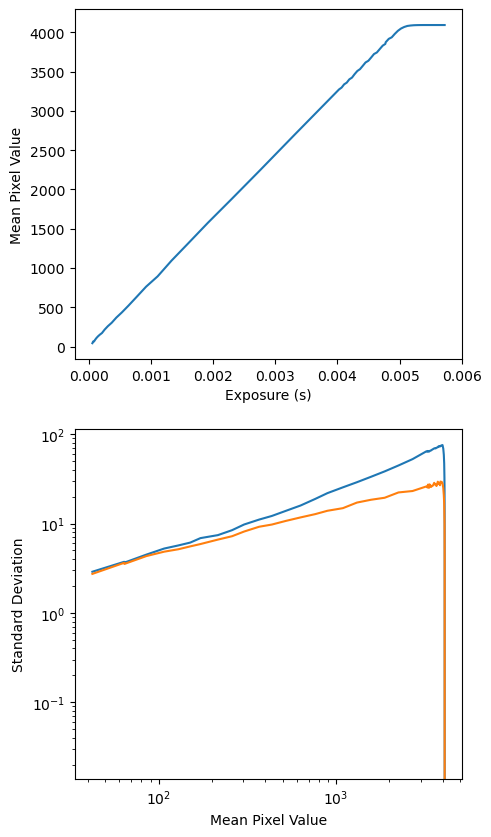

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\1_475\475_72us

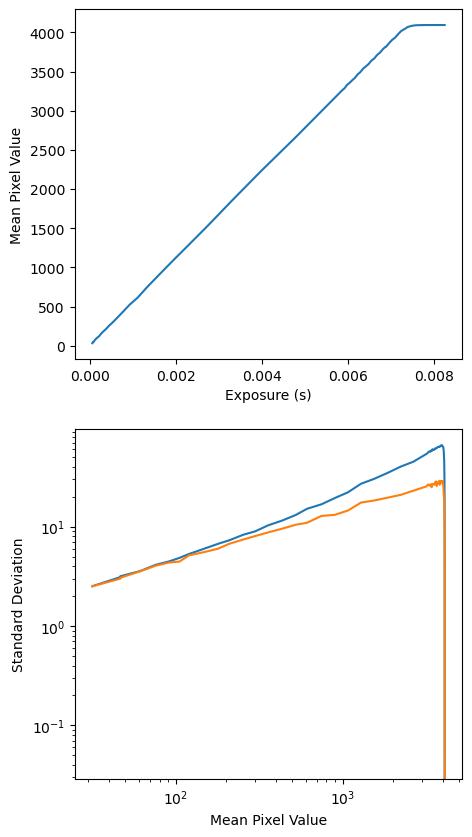

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\3_400\400_72us

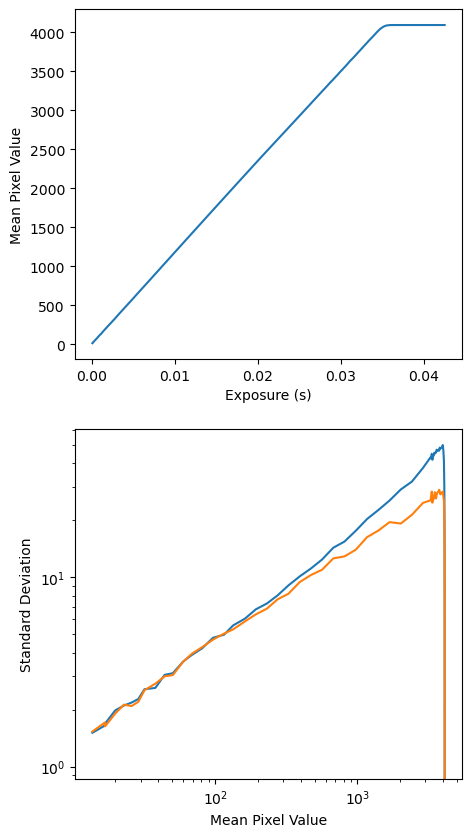

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\4_725\725_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\4_725\725_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\4_725\725_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\4_725\725_72us

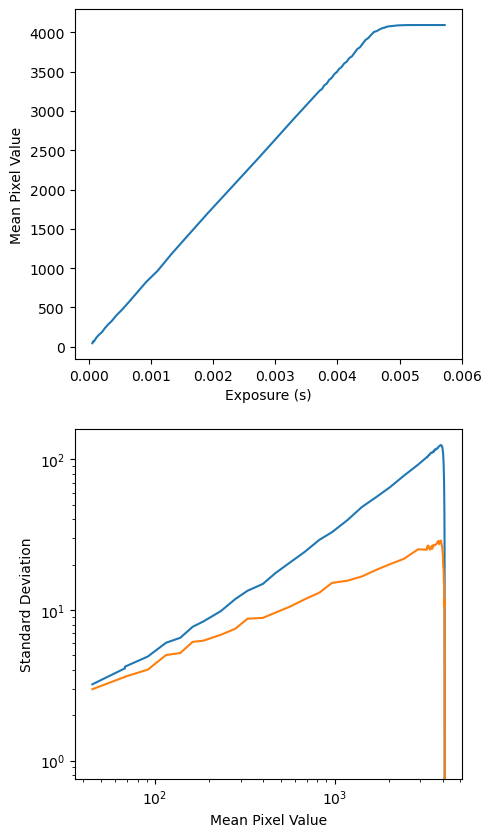

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\5_850\850_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\5_850\850_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\5_850\850_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\5_850\850_72us

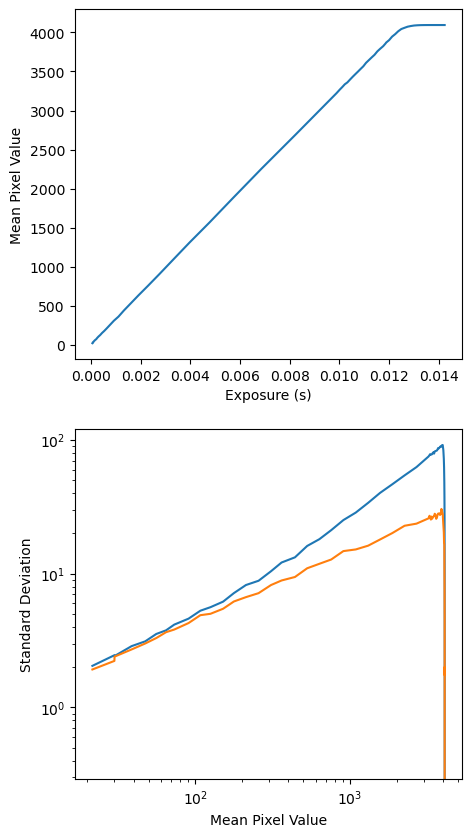

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\7_950\950_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\7_950\950_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\7_950\950_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\7_950\950_72us

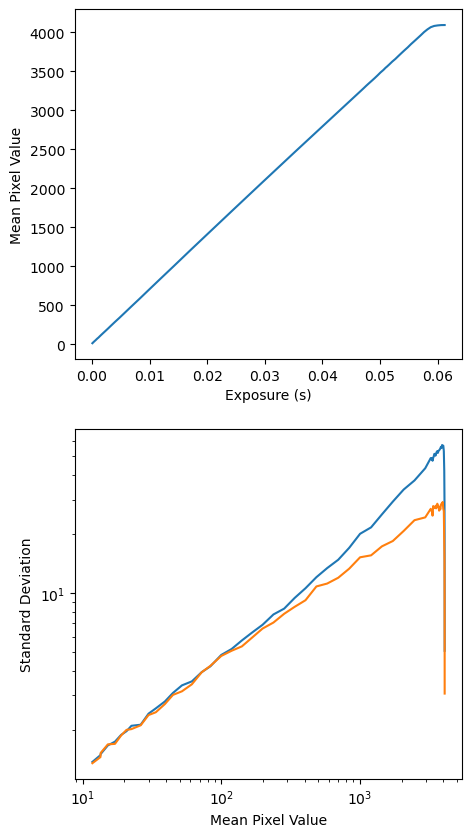

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT99\6_550\550_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT99\6_550\550_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT99\6_550\550_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT99\6_550\550_72us

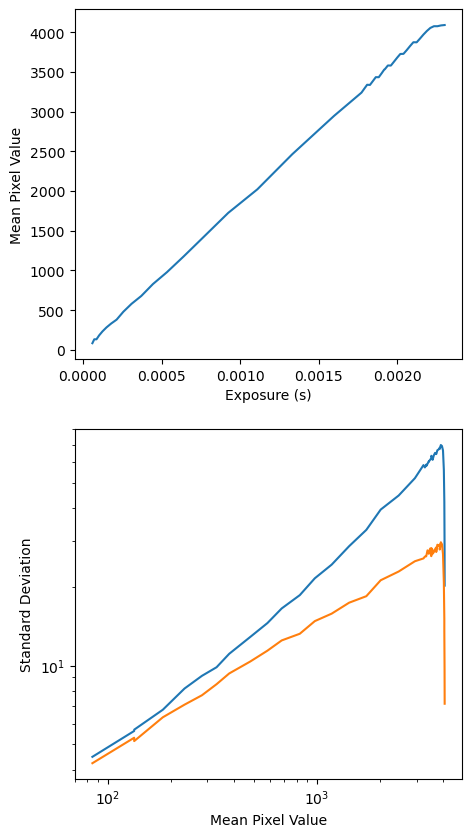

In [8]:
sct99_exposures = {}
for camera in cameras:
    sct99_exposures[camera] = camera_calibration_sequence(camera, 'SCT99')

# SCT5 Procedure

Output:
- SCT5 Exposure List
- SCT5 Lit Image Directory

-----------------------------------
Device 0
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 103.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.3179805874824524
Exposure set to 0.31797999143600464 (err of 6.061915344135471e-07
Trial 1:
Imaging with Exposure: 0.31797999143600464 s
+Good exposure 0.31797999143600464 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.31797999143600464
Exposure Value set to 0.05087679997086525
Exposure set to 0.05087599903345108 (err of 7.995963096640857e-07
Trial 2:
Imaging with Exposure: 0.05087599903345108 s
+Good exposure 0.05087599903345108 Image recieved
Quantile: 2291.0, Target: 3275.2000000000003
Exposure current Value: 0.05087599903345108
Exposure Value set to 0.0727320238

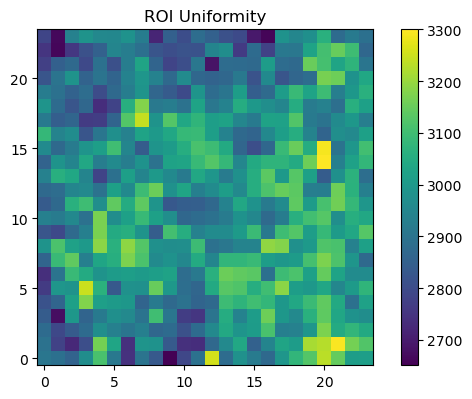

ROI Uniformity: 3.8351514985445623 %
-----------------------------------
-----------------------------------
Device 1
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 71.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.4612957835197449
Exposure set to 0.4612950086593628 (err of 7.878988982357171e-07
Trial 1:
Imaging with Exposure: 0.4612950086593628 s
+Good exposure 0.4612950086593628 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.4612950086593628
Exposure Value set to 0.07380720227956772
Exposure set to 0.0738070011138916 (err of 2.0027160645141873e-07
Trial 2:
Imaging with Exposure: 0.0738070011138916 s
+Good exposure 0.0738070011138916 Image recieved
Quantile: 2163.0, Target: 3275.2000000000003
Exposure cur

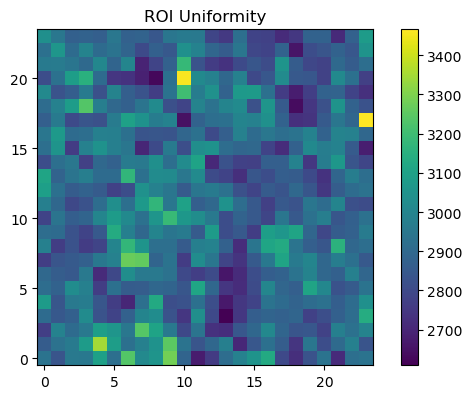

ROI Uniformity: 4.077486049755889 %
-----------------------------------
-----------------------------------
Device 3
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 25.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 1.3100800514221191
Exposure set to 1.3100800514221191 (err of 1.0803341998766314e-08
Trial 1:
Imaging with Exposure: 1.3100800514221191 s
+Good exposure 1.3100800514221191 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 1.3100800514221191
Exposure Value set to 0.20961280167102814
Exposure set to 0.20961199700832367 (err of 8.112192153852948e-07
Trial 2:
Imaging with Exposure: 0.20961199700832367 s
+Good exposure 0.20961199700832367 Image recieved
Quantile: 1301.0, Target: 3275.2000000000003
Exposure c

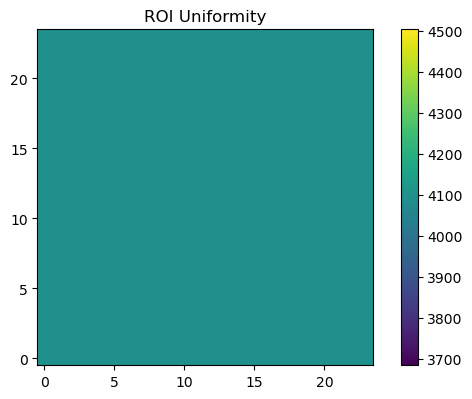

ROI Uniformity: 0.0 %
-----------------------------------
-----------------------------------
Device 4
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 115.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.2848000228404999
Exposure set to 0.2847999930381775 (err of 2.0489096641540527e-08
Trial 1:
Imaging with Exposure: 0.2847999930381775 s
+Good exposure 0.2847999930381775 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.2847999930381775
Exposure Value set to 0.04556800052523613
Exposure set to 0.04556800052523613 (err of -1.6391277293803519e-09
Trial 2:
Imaging with Exposure: 0.04556800052523613 s
+Good exposure 0.04556800052523613 Image recieved
Quantile: 2370.0, Target: 3275.2000000000003
Exposure current Valu

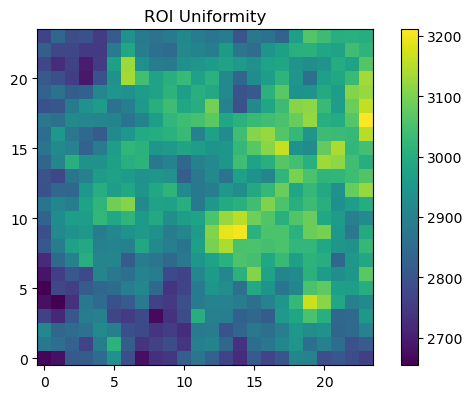

ROI Uniformity: 3.5549942885180017 %
-----------------------------------
-----------------------------------
Device 5
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 52.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.6298461556434631
Exposure set to 0.6298459768295288 (err of 2.0693271218785725e-07
Trial 1:
Imaging with Exposure: 0.6298459768295288 s
-Bad exposure 0.6298459768295288 No image recieved in 5000 ms
Quantile: 1.0, Target: 3275.2000000000003
Exposure current Value: 0.6298459768295288
Exposure out of range. Setting to 50.0
Exposure Value set to 50.0
Exposure set to 50.0 (err of 0.0
Trial 2:
Imaging with Exposure: 50.0 s
+Good exposure 50.0 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 50.0
Exposure 

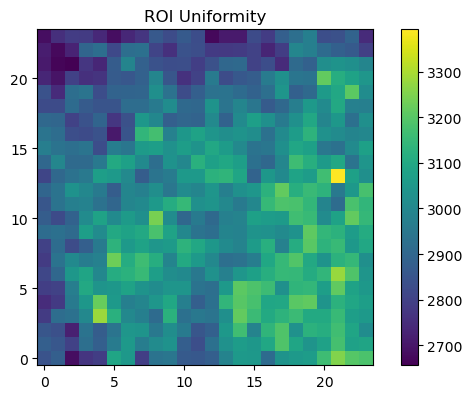

ROI Uniformity: 4.208327084100715 %
-----------------------------------
-----------------------------------
Device 7
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 22.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 1.488727331161499
Exposure set to 1.4887269735336304 (err of 3.699043935601054e-07
Trial 1:
Imaging with Exposure: 1.4887269735336304 s
+Good exposure 1.4887269735336304 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 1.4887269735336304
Exposure Value set to 0.23819631338119507
Exposure set to 0.23819600045681 (err of 3.1530857086403685e-07
Trial 2:
Imaging with Exposure: 0.23819600045681 s
+Good exposure 0.23819600045681 Image recieved
Quantile: 1086.0, Target: 3275.2000000000003
Exposure current Val

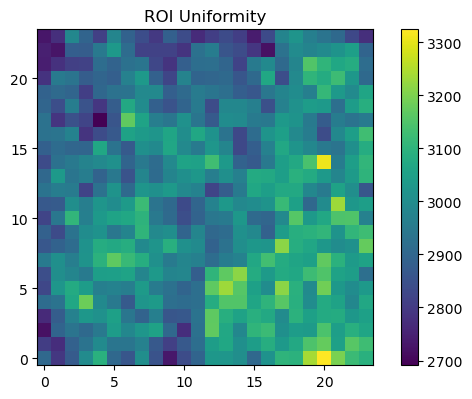

ROI Uniformity: 3.4246362225216456 %
-----------------------------------
-----------------------------------
Device 6
-----------------------------------
Initiating search:
Exposure Auto set to 0
Exposure Value set to 0.0020000000949949026
Trial 0:
Imaging with Exposure: 0.0020000000949949026 s
+Good exposure 0.0020000000949949026 Image recieved
Quantile: 211.0, Target: 3275.2000000000003
Exposure current Value: 0.0020000000949949026
Exposure Value set to 0.15522275865077972
Exposure set to 0.15522199869155884 (err of 7.574962919976169e-07
Trial 1:
Imaging with Exposure: 0.15522199869155884 s
+Good exposure 0.15522199869155884 Image recieved
Quantile: 4094.0, Target: 3275.2000000000003
Exposure current Value: 0.15522199869155884
Exposure Value set to 0.02483551949262619
Exposure set to 0.024834999814629555 (err of 5.199760198595915e-07
Trial 2:
Imaging with Exposure: 0.024834999814629555 s
+Good exposure 0.024834999814629555 Image recieved
Quantile: 2467.0, Target: 3275.2000000000003
E

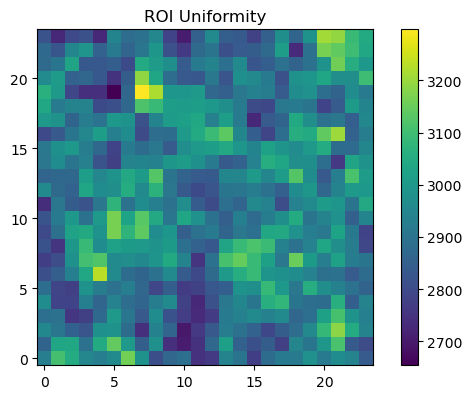

ROI Uniformity: 3.428033409467546 %
-----------------------------------


In [10]:
osc.check_channel_roi_uniformity(cameras)

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\0_650\650_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\0_650\650_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\0_650\650_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\0_650\650_72us_2_c

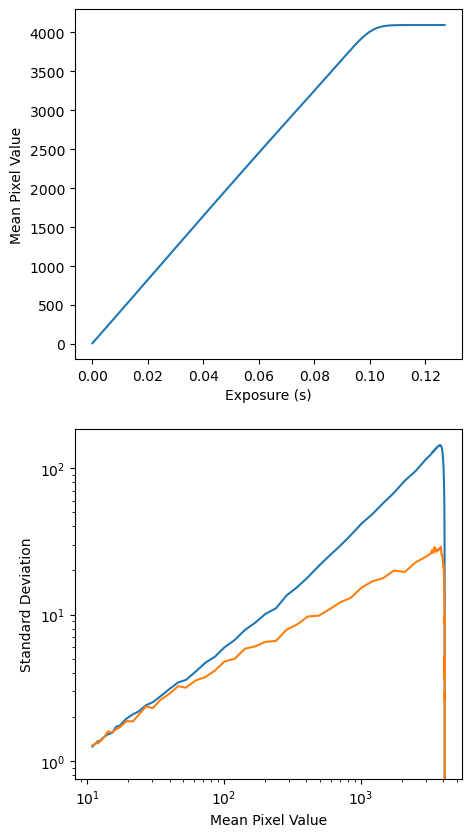

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\1_475\475_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\1_475\475_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\1_475\475_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\1_475\475_72us_2_c

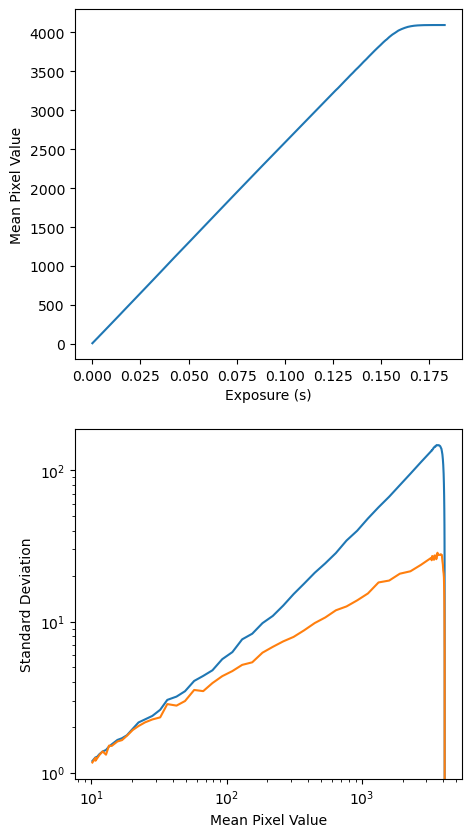

Exposure Auto set to 0
Exposure: 0.0000600 s
Exposure Value set to 6.000239955028519e-05
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Imaging with Exposure: 5.999999848427251e-05 s
+Good exposure 5.999999848427251e-05 Image recieved
Exposure current Value: 5.999999848427251e-05
Image 60us_1 written to ..\data\SCT5\3_400\400_60us_1_calibration.tif
Exposure current Value: 5.999999848427251e-05
Image 60us_2 written to ..\data\SCT5\3_400\400_60us_2_calibration.tif
Exposure: 0.0000720 s
Exposure Value set to 7.200287654995918e-05
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Imaging with Exposure: 7.200000254670158e-05 s
+Good exposure 7.200000254670158e-05 Image recieved
Exposure current Value: 7.200000254670158e-05
Image 72us_1 written to ..\data\SCT5\3_400\400_72us_1_calibration.tif
Exposure current Value: 7.200000254670158e-05
Image 72us_2 written to ..\data\SCT5\3_400\400_72us_2_c

ValueError: operands could not be broadcast together with shapes (1200,1920) (24,24) 

In [9]:
sct5_exposures = {}
for camera in cameras:
    sct5_exposures[camera] = camera_calibration_sequence(camera, 'SCT5')

# Dark Signal Procedure

Output:
- Dark Exposure List
- Dark Image Directory

In [ ]:
for camera in cameras:
    dark_exposures = camera_calibration_sequence(camera, 'dark_48dB')

# Dark Frame Capture

Output:
- addition of dark mean frames to SCT99 directory
- addition of dark mean frames to SCT5 directory

In [ ]:
for camera in cameras:
    exposures = sct99_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT99', 'drk', drk_ave)

In [ ]:
for camera in cameras:
    exposures = sct5_exposures[camera]
    for exposure in exposures:
        camera.set_property('Exposure', 'Value', exposure, 'AbsoluteValue')
        drk = camera.image_capture(roi=True)
        for i in range(24):
            drk += camera.image_capture(roi=True)
        drk_ave = drk.astype(np.float32)/25
        name = f'{exposure*1E6:.0f}us_d'
        camera.save_image(name, 'SCT5', 'drk', drk_ave)